In [69]:
# importing the standard libraries
import numpy as np
import pandas as pd

# step 1
from keras.datasets import mnist

# step 2
import matplotlib.pyplot as plt

# step 3
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# step 5
from sklearn.metrics import confusion_matrix
import seaborn as sns

### 1. Loading the MNIST dataset.

In [2]:
# loading the MNIST dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [3]:
# checking the test and training vectors
print('train_x shape: ' +str(train_x.shape))
print('train_y shape: ' +str(train_y.shape))
print('test_x shape: ' +str(test_x.shape))
print('test_y shape: ' +str(test_y.shape))

train_x shape: (60000, 28, 28)
train_y shape: (60000,)
test_x shape: (10000, 28, 28)
test_y shape: (10000,)


### 2. Displaying the first five images in the training data set.

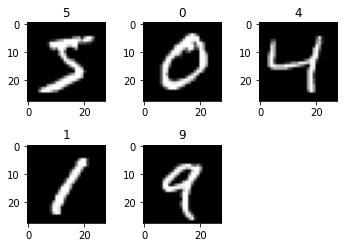

In [5]:
# setting the plot height and width
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

# displaying the images and associated labels
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i])
plt.tight_layout()
plt.show()

### 3. Building and training a Keras CNN classifier on the training set.

In [6]:
# ensuring the color channel value will be last
K.set_image_data_format("channels_last")

In [7]:
# set seed 
np.random.seed(0)

In [8]:
# setting the image information
height = 28
width = 28
channels = 1

In [23]:
# reshaping the training image data into the features set
train_features = train_x.reshape(train_x.shape[0], height, width, channels)

In [24]:
# reshaping the test image data into features
test_features = test_x.reshape(test_x.shape[0], height, width, channels)

In [25]:
# rescaling the pixel intensity
features_train = train_features / 255
features_test = test_features / 255

In [26]:
# one-hot encoding the target
train_target = np_utils.to_categorical(train_y) 
test_target = np_utils.to_categorical(test_y)
number_of_classes = test_target.shape[1]

In [27]:
# starting the neural network
network = Sequential()

In [28]:
# adding the convolutional layer
network.add(Conv2D(filters=64, 
                  kernel_size=(5,5),
                  input_shape=(height, width, channels), 
                  activation='relu'))

In [29]:
# adding the max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
# adding the dropout layer
network.add(Dropout(0.5))

In [31]:
# adding the layer to flatten input
network.add(Flatten())

In [32]:
# adding a fully connected layer
network.add(Dense(128, activation='relu'))

In [33]:
# adding a dropout layer
network.add(Dropout(0.5))

In [34]:
# adding a fully connected layer with softmax activation function
network.add(Dense(number_of_classes, activation='softmax'))

In [35]:
# compiling the neural network
network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

In [37]:
# training the neural network
NN = network.fit(features_train, train_target, 
                 epochs=2,verbose=0,batch_size=1000,
                 validation_data=(features_test, test_target))

### 4. Reporting the accuracy of the model.

In [51]:
# determining the accuracy of the model
Accuracy = NN.history['val_accuracy']
Accuracy

[0.9775000214576721, 0.9811999797821045]

### 5. Displaying a confusion matrix on the test set classifications.

In [56]:
# creating the predictions to help generate the confusion matrix
predictions = network.predict(test_x)
predictions

313/313 [==============================] - 3s 9ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
# creating the confusion matrix
matrix = confusion_matrix(test_target.argmax(axis=1), predictions.argmax(axis=1))
matrix

array([[ 970,    0,    1,    0,    0,    0,    3,    1,    5,    0],
       [   0, 1108,    2,    1,    0,    0,    3,    0,   21,    0],
       [   2,    0, 1000,    0,    2,    0,    1,    6,   21,    0],
       [   0,    0,    3,  984,    0,    2,    0,    2,   19,    0],
       [   1,    0,    4,    0,  959,    0,    4,    0,    4,   10],
       [   2,    0,    0,    4,    0,  857,    5,    1,   22,    1],
       [   7,    2,    0,    0,    2,    1,  936,    0,   10,    0],
       [   1,    0,   15,    3,    0,    0,    0,  981,   11,   17],
       [   2,    0,    0,    1,    1,    0,    0,    0,  969,    1],
       [   5,    3,    0,    4,    3,    0,    0,    2,   19,  973]],
      dtype=int64)

Text(0.5, 15.0, 'True Values')

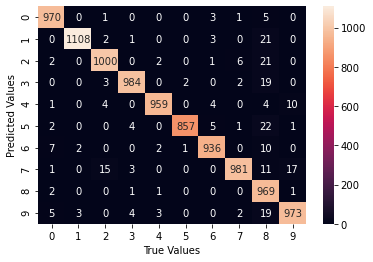

In [77]:
pretty_matrix = sns.heatmap(matrix, fmt="d", annot=True)
pretty_matrix.set_ylabel("Predicted Values")
pretty_matrix.set_xlabel("True Values")

### 6. Summarizing the findings. 

The accuracy of the neural network model came to be 98% accurate. The confusion matrix showed that the worst predictions were for values thought to be the value 8. The model predicted wrong for value 8 the highest amount of times. Value 5 had the least amount of wrong predictions while value 2 came in close second. 